## 2.6. Probability and Statistics
https://d2l.ai/chapter_preliminaries/probability.html

## 2.6.8. Exercises 1

## 1. Vẽ đồ thị Entropy của phân phối Bernoulli theo xác suất 𝑝:

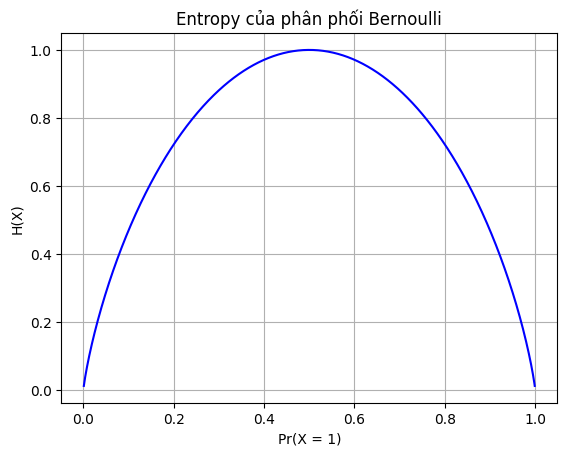

In [16]:
import numpy as np
import matplotlib.pyplot as plt

def bernoulli_entropy(p):
    return -p * np.log2(p) - (1 - p) * np.log2(1 - p)

p_vals = np.linspace(0.001, 0.999, 1000)  # tránh log(0)
entropy_vals = bernoulli_entropy(p_vals)

plt.plot(p_vals, entropy_vals, color='blue')
plt.xlabel("Pr(X = 1)")
plt.ylabel("H(X)")
plt.title("Entropy của phân phối Bernoulli")
plt.grid(True)
plt.show()


##  2. Mô phỏng và trực quan hóa mối quan hệ giữa kích thước tập dữ liệu quan sát và entropy, có kèm theo:

* Đường entropy ước lượng từ dữ liệu.

* Đường entropy lý thuyết cho  𝑝 = 0.95

* Đường entropy tối đa khi 𝑝 = 0.5 để đối chiếu.

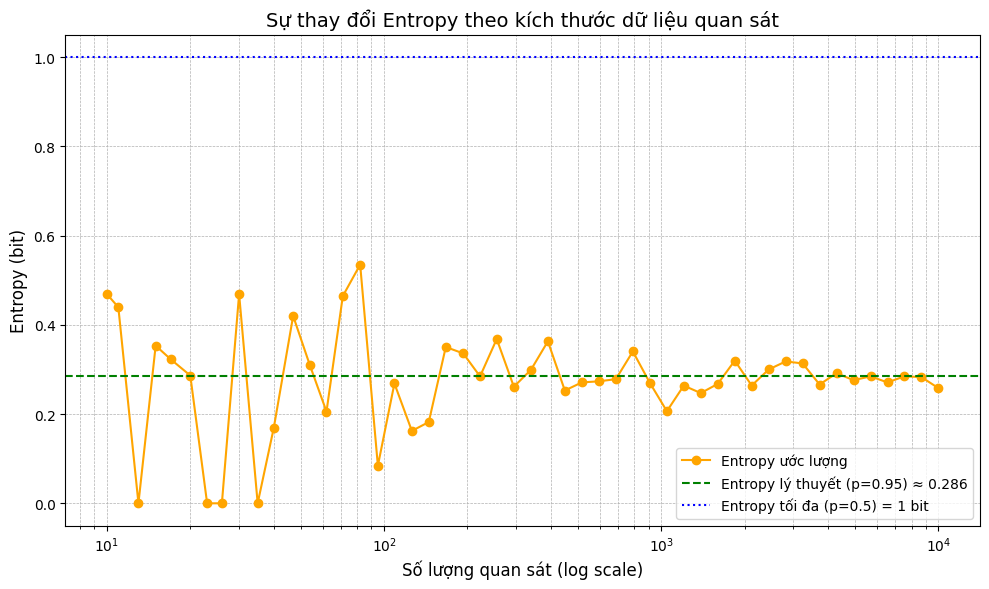

In [17]:
import numpy as np
import matplotlib.pyplot as plt

# Hàm tính entropy Bernoulli với log cơ số 2
def bernoulli_entropy(p):
    if p <= 0 or p >= 1:
        return 0.0
    return -p * np.log2(p) - (1 - p) * np.log2(1 - p)

# Tham số thực tế (p thật của đồng xu)
p_true = 0.95
entropy_true = bernoulli_entropy(p_true)
entropy_max = bernoulli_entropy(0.5)

# Các kích thước mẫu (log scale)
sample_sizes = np.logspace(1, 4, num=50, dtype=int)
estimated_entropies = []

# Mô phỏng: với mỗi n, tạo n mẫu Bernoulli với p = 0.95, tính entropy từ p_hat
np.random.seed(42)  # Đặt seed để tái lập kết quả
for n in sample_sizes:
    samples = np.random.binomial(n=1, p=p_true, size=n)
    p_hat = np.mean(samples)
    H_hat = bernoulli_entropy(p_hat)
    estimated_entropies.append(H_hat)

# Vẽ biểu đồ
plt.figure(figsize=(10, 6))
plt.plot(sample_sizes, estimated_entropies, marker='o', color='orange', label='Entropy ước lượng')
plt.axhline(entropy_true, color='green', linestyle='--', label=f'Entropy lý thuyết (p={p_true}) ≈ {entropy_true:.3f}')
plt.axhline(entropy_max, color='blue', linestyle=':', label='Entropy tối đa (p=0.5) = 1 bit')

plt.xscale('log')
plt.xlabel('Số lượng quan sát (log scale)', fontsize=12)
plt.ylabel('Entropy (bit)', fontsize=12)
plt.title('Sự thay đổi Entropy theo kích thước dữ liệu quan sát', fontsize=14)
plt.grid(True, which="both", linestyle='--', linewidth=0.5)
plt.legend()
plt.tight_layout()
plt.show()


## 3. Trung bình 10.000 lần thử (Monte Carlo Averaging)

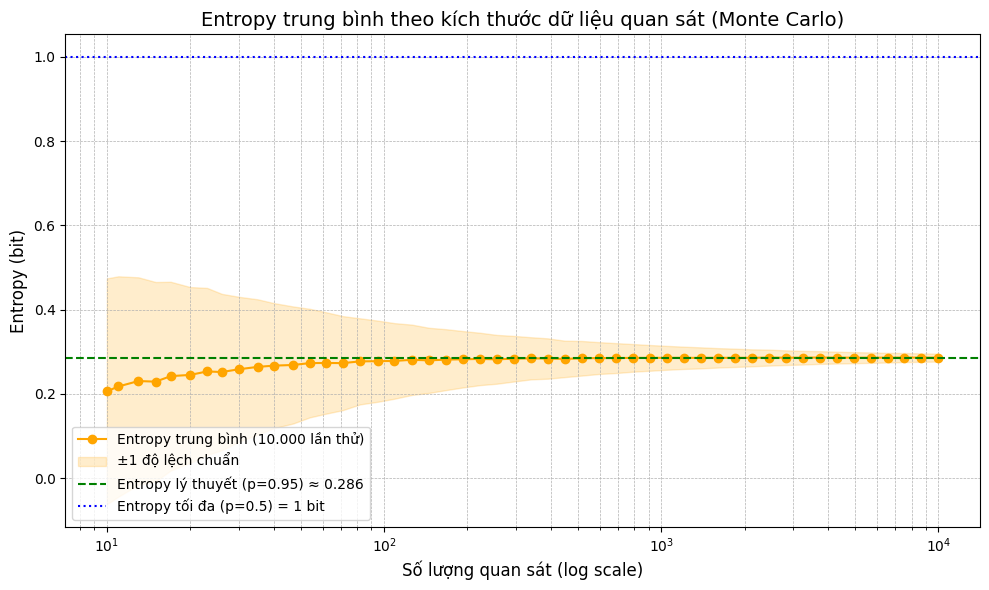

In [18]:
import numpy as np
import matplotlib.pyplot as plt

# Hàm tính entropy của phân phối Bernoulli
def bernoulli_entropy(p):
    if p <= 0 or p >= 1:
        return 0.0
    return -p * np.log2(p) - (1 - p) * np.log2(1 - p)

# Xác suất thật của đồng xu
p_true = 0.95
entropy_true = bernoulli_entropy(p_true)
entropy_max = bernoulli_entropy(0.5)

# Các kích thước mẫu (log scale)
sample_sizes = np.logspace(1, 4, num=50, dtype=int)

# Số lần mô phỏng mỗi kích thước
num_trials = 10000

# Danh sách lưu kết quả
mean_entropies = []
std_entropies = []

# Đặt seed để tái lập kết quả
np.random.seed(42)

# Mô phỏng Monte Carlo
for n in sample_sizes:
    entropies = []
    for _ in range(num_trials):
        samples = np.random.binomial(n=1, p=p_true, size=n)
        p_hat = np.mean(samples)
        H_hat = bernoulli_entropy(p_hat)
        entropies.append(H_hat)
    mean_entropies.append(np.mean(entropies))
    std_entropies.append(np.std(entropies))

# Vẽ biểu đồ kết quả
plt.figure(figsize=(10, 6))
plt.plot(sample_sizes, mean_entropies, marker='o', color='orange', label='Entropy trung bình (10.000 lần thử)')
plt.fill_between(sample_sizes,
                 np.array(mean_entropies) - np.array(std_entropies),
                 np.array(mean_entropies) + np.array(std_entropies),
                 color='orange', alpha=0.2, label='±1 độ lệch chuẩn')
plt.axhline(entropy_true, color='green', linestyle='--', label=f'Entropy lý thuyết (p={p_true}) ≈ {entropy_true:.3f}')
plt.axhline(entropy_max, color='blue', linestyle=':', label='Entropy tối đa (p=0.5) = 1 bit')

plt.xscale('log')
plt.xlabel('Số lượng quan sát (log scale)', fontsize=12)
plt.ylabel('Entropy (bit)', fontsize=12)
plt.title('Entropy trung bình theo kích thước dữ liệu quan sát (Monte Carlo)', fontsize=14)
plt.grid(True, which="both", linestyle='--', linewidth=0.5)
plt.legend()
plt.tight_layout()
plt.show()


## 4. So sánh entropy trung bình với nhiều giá trị p trong phân phối Bernoulli.

## 5. Mô phỏng entropy cho biến rời rạc nhiều hơn 2 giá trị.

## 6. Tính và vẽ KL-Divergence giữa phân phối ước lượng và phân phối thật.

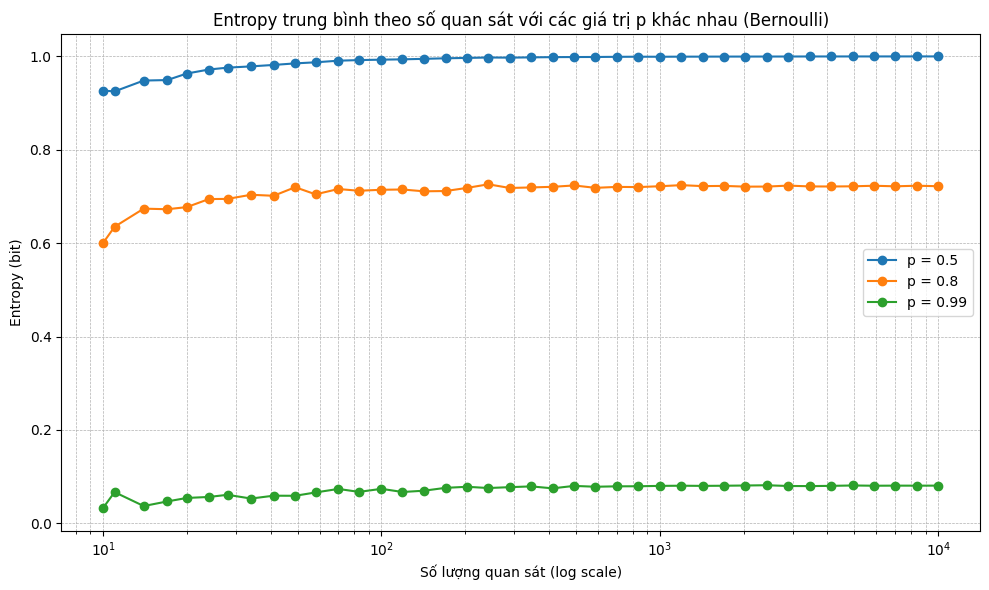

In [19]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import entropy as kl_divergence

# ========= (4) So sánh nhiều giá trị p trong phân phối Bernoulli =========

def bernoulli_entropy(p):
    if p <= 0 or p >= 1:
        return 0.0
    return -p * np.log2(p) - (1 - p) * np.log2(1 - p)

ps = [0.5, 0.8, 0.99]
sample_sizes = np.logspace(1, 4, num=40, dtype=int)
num_trials = 300

plt.figure(figsize=(10, 6))
for p_true in ps:
    mean_entropies = []
    for n in sample_sizes:
        entropies = []
        for _ in range(num_trials):
            samples = np.random.binomial(n=1, p=p_true, size=n)
            p_hat = np.mean(samples)
            H_hat = bernoulli_entropy(p_hat)
            entropies.append(H_hat)
        mean_entropies.append(np.mean(entropies))
    plt.plot(sample_sizes, mean_entropies, marker='o', label=f'p = {p_true}')

plt.xscale('log')
plt.xlabel('Số lượng quan sát (log scale)')
plt.ylabel('Entropy (bit)')
plt.title('Entropy trung bình theo số quan sát với các giá trị p khác nhau (Bernoulli)')
plt.grid(True, which="both", linestyle='--', linewidth=0.5)
plt.legend()
plt.tight_layout()
plt.show()



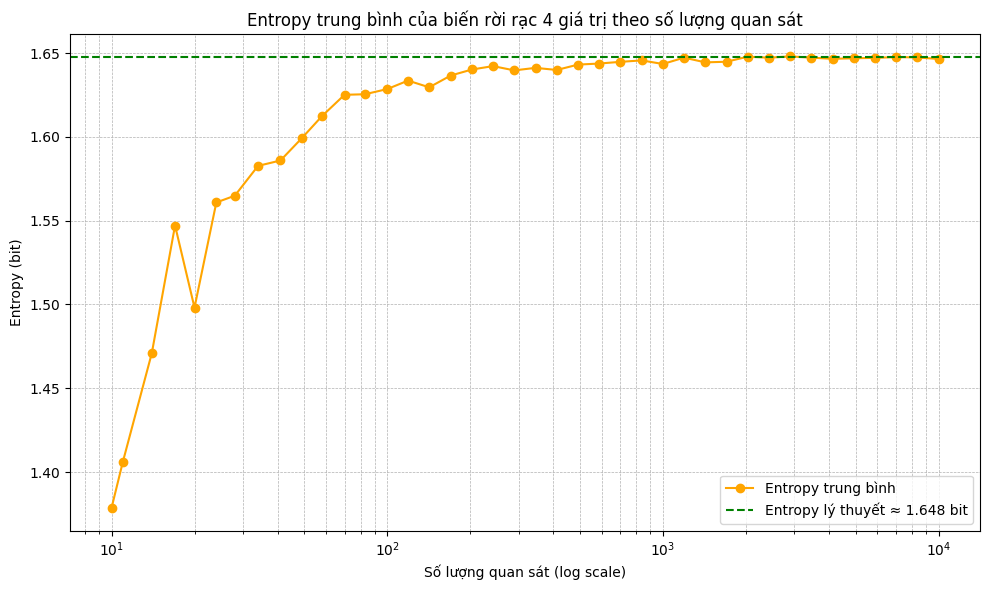

In [20]:
# ========= (5) Mô phỏng entropy cho biến rời rạc nhiều giá trị =========

def discrete_entropy(p_vec):
    p_vec = np.array(p_vec)
    p_vec = p_vec[p_vec > 0]
    return -np.sum(p_vec * np.log2(p_vec))

# Phân phối thật: 4 giá trị không đều
p_true_vec = np.array([0.5, 0.3, 0.15, 0.05])
n_categories = len(p_true_vec)
mean_entropies = []

for n in sample_sizes:
    entropies = []
    for _ in range(num_trials):
        samples = np.random.choice(n_categories, size=n, p=p_true_vec)
        counts = np.bincount(samples, minlength=n_categories)
        p_hat_vec = counts / np.sum(counts)
        H_hat = discrete_entropy(p_hat_vec)
        entropies.append(H_hat)
    mean_entropies.append(np.mean(entropies))

entropy_true_discrete = discrete_entropy(p_true_vec)

plt.figure(figsize=(10, 6))
plt.plot(sample_sizes, mean_entropies, marker='o', color='orange', label='Entropy trung bình')
plt.axhline(entropy_true_discrete, linestyle='--', color='green',
            label=f'Entropy lý thuyết ≈ {entropy_true_discrete:.3f} bit')
plt.xscale('log')
plt.xlabel('Số lượng quan sát (log scale)')
plt.ylabel('Entropy (bit)')
plt.title('Entropy trung bình của biến rời rạc 4 giá trị theo số lượng quan sát')
plt.grid(True, which="both", linestyle='--', linewidth=0.5)
plt.legend()
plt.tight_layout()
plt.show()



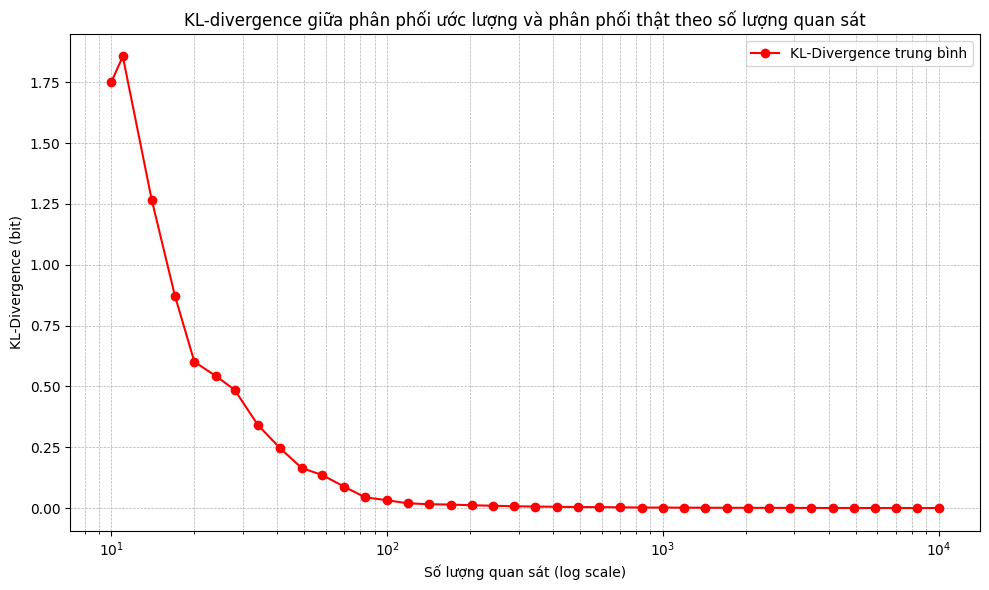

In [21]:
# ========= (6) KL-divergence giữa phân phối ước lượng và thật =========

kl_means = []
for n in sample_sizes:
    kls = []
    for _ in range(num_trials):
        samples = np.random.choice(n_categories, size=n, p=p_true_vec)
        counts = np.bincount(samples, minlength=n_categories)
        p_hat_vec = counts / np.sum(counts)
        # Tránh log(0)
        p_hat_vec = np.clip(p_hat_vec, 1e-10, 1)
        kls.append(kl_divergence(p_true_vec, p_hat_vec, base=2))
    kl_means.append(np.mean(kls))

plt.figure(figsize=(10, 6))
plt.plot(sample_sizes, kl_means, marker='o', color='red', label='KL-Divergence trung bình')
plt.xscale('log')
plt.xlabel('Số lượng quan sát (log scale)')
plt.ylabel('KL-Divergence (bit)')
plt.title('KL-divergence giữa phân phối ước lượng và phân phối thật theo số lượng quan sát')
plt.grid(True, which="both", linestyle='--', linewidth=0.5)
plt.legend()
plt.tight_layout()
plt.show()


## 7. So sánh KL-divergence giữa nhiều phân phối thật khác nhau.

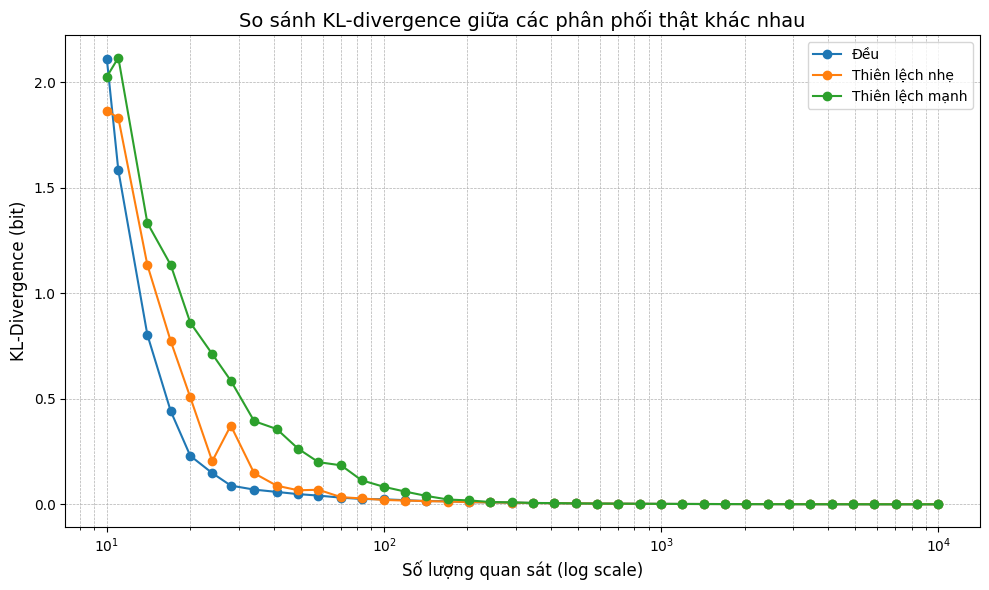

In [22]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import entropy as kl_divergence

# Hàm: Tính KL-divergence trung bình giữa phân phối thật và ước lượng
def compute_kl_curve(p_true_vec, sample_sizes, num_trials=300):
    kl_means = []
    n_categories = len(p_true_vec)
    for n in sample_sizes:
        kls = []
        for _ in range(num_trials):
            samples = np.random.choice(n_categories, size=n, p=p_true_vec)
            counts = np.bincount(samples, minlength=n_categories)
            p_hat = counts / np.sum(counts)
            # Tránh log(0)
            p_hat = np.clip(p_hat, 1e-10, 1)
            kls.append(kl_divergence(p_true_vec, p_hat, base=2))
        kl_means.append(np.mean(kls))
    return kl_means

# Thiết lập các phân phối thật để so sánh
true_distributions = {
    "Đều": np.array([0.25, 0.25, 0.25, 0.25]),
    "Thiên lệch nhẹ": np.array([0.4, 0.3, 0.2, 0.1]),
    "Thiên lệch mạnh": np.array([0.7, 0.2, 0.08, 0.02])
}

# Kích thước mẫu quan sát
sample_sizes = np.logspace(1, 4, num=40, dtype=int)

# Vẽ biểu đồ
plt.figure(figsize=(10, 6))

for label, p_true in true_distributions.items():
    kl_curve = compute_kl_curve(p_true, sample_sizes)
    plt.plot(sample_sizes, kl_curve, marker='o', label=label)

# Biểu đồ
plt.xscale('log')
plt.xlabel('Số lượng quan sát (log scale)', fontsize=12)
plt.ylabel('KL-Divergence (bit)', fontsize=12)
plt.title('So sánh KL-divergence giữa các phân phối thật khác nhau', fontsize=14)
plt.grid(True, which="both", linestyle='--', linewidth=0.5)
plt.legend()
plt.tight_layout()
plt.show()
